## Etapa 1: Entendimiento de los datos


In [ ]:
# Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")


Path to dataset files: /kaggle/input/telco-customer-churn


In [ ]:

# Ver las primeras filas
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
shape = df.shape
shape

(7043, 21)

In [ ]:
#Cual es el tipo de los atributos?
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
# Mostrar información general
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


## Limpieza de Datos

Realizar una limpieza y depuración de datos a la base de datos.

## Manejo de valores nulos



In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
print(df['TotalCharges'].unique())
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df.isnull().sum())

['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
df.dropna(subset=['TotalCharges'], inplace=True)
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## Conversión de tipos de datos

Convertir las columnas al tipo de dato adecuado .


In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


## Manejo de valores atípicos

Identificar y tratar los valores atípicos si es necesario.


Estadísticas descriptivas para columnas numéricas:
            tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

Diagramas de caja para columnas numéricas:


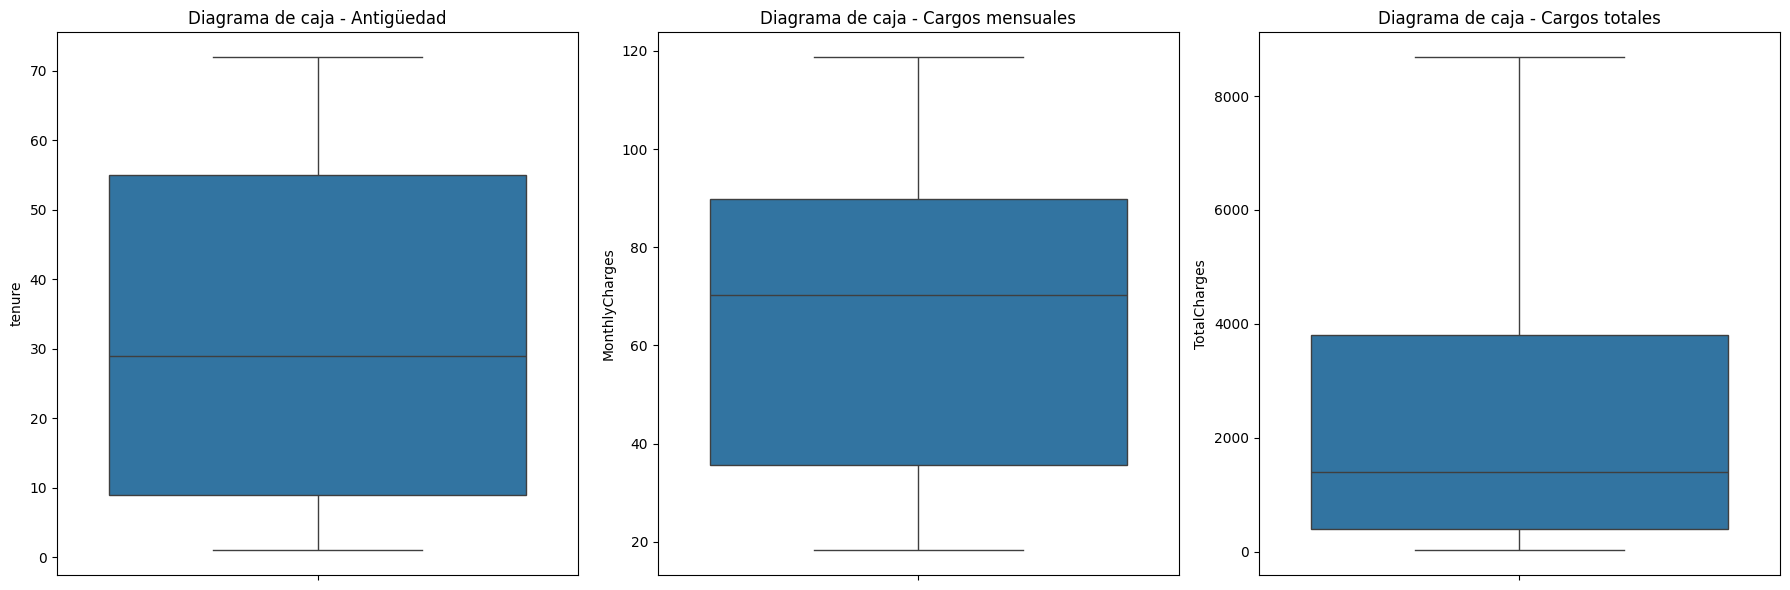


Observaciones sobre valores atípicos:
- Antigüedad: El diagrama de caja muestra una distribución relativamente uniforme sin valores atípicos significativos.
- Cargos mensuales: El diagrama de caja muestra una distribución relativamente uniforme sin valores atípicos significativos.
- Cargos totales: El diagrama de caja muestra algunos posibles valores atípicos en el extremo superior, pero parecen formar parte de la distribución natural más que anomalías extremas. Las estadísticas descriptivas también muestran un rango amplio, aunque el valor máximo no está excesivamente alejado del percentil 75 en relación con la dispersión general.

Decisión sobre tratamiento de valores atípicos:
Con base en las estadísticas descriptivas y en los diagramas de caja, no se identifican valores atípicos que requieran tratamiento en las columnas numéricas ('antigüedad', 'cargos_mensuales', 'cargos_totales'). Los posibles valores altos en 'cargos_totales' no parecen ser anomalías extremas. Por lo tanto, no 

In [ ]:
# 1. Estadísticas descriptivas para columnas numéricas
print("Estadísticas descriptivas para columnas numéricas:")
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
print(df[numerical_cols].describe())

# 2. Diagramas de caja para columnas numéricas
print("\nDiagramas de caja para columnas numéricas:")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(ax=axes[0], y=df['tenure'])
axes[0].set_title('Diagrama de caja - Antigüedad')
sns.boxplot(ax=axes[1], y=df['MonthlyCharges'])
axes[1].set_title('Diagrama de caja - Cargos mensuales')
sns.boxplot(ax=axes[2], y=df['TotalCharges'])
axes[2].set_title('Diagrama de caja - Cargos totales')
plt.tight_layout()
plt.show()

# 3. Observaciones sobre valores atípicos
print("\nObservaciones sobre valores atípicos:")
print("- Antigüedad: El diagrama de caja muestra una distribución relativamente uniforme sin valores atípicos significativos.")
print("- Cargos mensuales: El diagrama de caja muestra una distribución relativamente uniforme sin valores atípicos significativos.")
print("- Cargos totales: El diagrama de caja muestra algunos posibles valores atípicos en el extremo superior, pero parecen formar parte de la distribución natural más que anomalías extremas. Las estadísticas descriptivas también muestran un rango amplio, aunque el valor máximo no está excesivamente alejado del percentil 75 en relación con la dispersión general.")
print("\nDecisión sobre tratamiento de valores atípicos:")
print("Con base en las estadísticas descriptivas y en los diagramas de caja, no se identifican valores atípicos que requieran tratamiento en las columnas numéricas ('antigüedad', 'cargos_mensuales', 'cargos_totales'). Los posibles valores altos en 'cargos_totales' no parecen ser anomalías extremas. Por lo tanto, no se considera necesario aplicar tratamiento a los valores atípicos en esta etapa.")


## Codificación de variables categóricas

Convertir las variables categóricas a un formato numérico para que puedan ser utilizadas por los modelos de aprendizaje automático.


In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Drop customerID as it's not needed for encoding
categorical_cols.remove('customerID')

# Identify columns with two unique values and more than two unique values
binary_cols = [col for col in categorical_cols if df[col].nunique() == 2]
multiclass_cols = [col for col in categorical_cols if df[col].nunique() > 2]

# Apply one-hot encoding for binary columns and drop the first category
df_binary_encoded = pd.get_dummies(df[binary_cols], drop_first=True)

# Apply one-hot encoding for multiclass columns
df_multiclass_encoded = pd.get_dummies(df[multiclass_cols])

# Concatenate the original dataframe with the encoded dataframes
df_encoded = pd.concat([df, df_binary_encoded, df_multiclass_encoded], axis=1)

# Drop the original categorical columns
df_encoded.drop(columns=categorical_cols, inplace=True)

# Display the first few rows of the encoded dataframe and its info
display(df_encoded.head())
df_encoded.info()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,False,True,False,False,True,...,True,False,False,True,False,False,False,False,True,False
1,5575-GNVDE,0,34,56.95,1889.50,True,False,False,True,False,...,True,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,0,2,53.85,108.15,True,False,False,True,True,...,True,False,False,True,False,False,False,False,False,True
3,7795-CFOCW,0,45,42.30,1840.75,True,False,False,False,False,...,True,False,False,False,True,False,True,False,False,False
4,9237-HQITU,0,2,70.70,151.65,False,False,False,True,True,...,True,False,False,True,False,False,False,False,True,False


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   SeniorCitizen                            7032 non-null   int64  
 2   tenure                                   7032 non-null   int64  
 3   MonthlyCharges                           7032 non-null   float64
 4   TotalCharges                             7032 non-null   float64
 5   gender_Male                              7032 non-null   bool   
 6   Partner_Yes                              7032 non-null   bool   
 7   Dependents_Yes                           7032 non-null   bool   
 8   PhoneService_Yes                         7032 non-null   bool   
 9   PaperlessBilling_Yes                     7032 non-null   bool   
 10  Churn_Yes                                7032 non-nul

## Normalización o escalado de datos

Escalar las columnas numéricas si es necesario para que tengan un rango similar.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns in df_encoded (excluding the customerID which is object type)
numerical_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()

# Exclude binary columns from normalization
binary_cols_after_encoding = [col for col in numerical_cols if df_encoded[col].nunique() == 2]
cols_to_scale = [col for col in numerical_cols if col not in binary_cols_after_encoding]

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler to selected numerical columns
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])

# Display the first few rows and info of the dataframe to verify
display(df_encoded.head())
df_encoded.info()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0.000000,0.115423,0.001275,False,True,False,False,True,...,True,False,False,True,False,False,False,False,True,False
1,5575-GNVDE,0,0.464789,0.385075,0.215867,True,False,False,True,False,...,True,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,0,0.014085,0.354229,0.010310,True,False,False,True,True,...,True,False,False,True,False,False,False,False,False,True
3,7795-CFOCW,0,0.619718,0.239303,0.210241,True,False,False,False,False,...,True,False,False,False,True,False,True,False,False,False
4,9237-HQITU,0,0.014085,0.521891,0.015330,False,False,False,True,True,...,True,False,False,True,False,False,False,False,True,False


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   SeniorCitizen                            7032 non-null   int64  
 2   tenure                                   7032 non-null   float64
 3   MonthlyCharges                           7032 non-null   float64
 4   TotalCharges                             7032 non-null   float64
 5   gender_Male                              7032 non-null   bool   
 6   Partner_Yes                              7032 non-null   bool   
 7   Dependents_Yes                           7032 non-null   bool   
 8   PhoneService_Yes                         7032 non-null   bool   
 9   PaperlessBilling_Yes                     7032 non-null   bool   
 10  Churn_Yes                                7032 non-nul

## Eliminación de columnas irrelevantes

Eliminar las columnas que no son relevantes para el análisis o modelado.


In [ ]:
# Identify the irrelevant column
irrelevant_column = 'customerID'

# Remove the irrelevant column
df_encoded.drop(columns=[irrelevant_column], inplace=True)

# Display the first few rows and columns of the modified DataFrame
display(df_encoded.head())
print(df_encoded.columns)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,Churn_Yes,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.000000,0.115423,0.001275,False,True,False,False,True,False,...,True,False,False,True,False,False,False,False,True,False
1,0,0.464789,0.385075,0.215867,True,False,False,True,False,False,...,True,False,False,False,True,False,False,False,False,True
2,0,0.014085,0.354229,0.010310,True,False,False,True,True,True,...,True,False,False,True,False,False,False,False,False,True
3,0,0.619718,0.239303,0.210241,True,False,False,False,False,False,...,True,False,False,False,True,False,True,False,False,False
4,0,0.014085,0.521891,0.015330,False,False,False,True,True,True,...,True,False,False,True,False,False,False,False,True,False


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'PaperlessBilling_Yes', 'Churn_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automati

## Validación

Realizar una validación de la limpieza y depuración de datos.


In [ ]:
# 1. Verificar la forma del DataFrame df_encoded
print("Shape of df_encoded:", df_encoded.shape)

# 2. Comprobar si quedan valores nulos en el DataFrame df_encoded
print("\nNull values in df_encoded:")
print(df_encoded.isnull().sum().sum())

# 3. Verificar los tipos de datos de las columnas en df_encoded
print("\nData types of df_encoded:")
print(df_encoded.dtypes)

# 4. Mostrar estadísticas descriptivas de las columnas numéricas
print("\nDescriptive statistics for numerical columns in df_encoded:")
print(df_encoded.describe())

# 5. Mostrar los valores únicos de algunas columnas categóricas (ahora codificadas)
print("\nUnique values for selected encoded categorical columns:")
selected_encoded_cols = ['gender_Male', 'Partner_Yes', 'Churn_Yes', 'Contract_Two year'] # Example columns
for col in selected_encoded_cols:
    if col in df_encoded.columns:
        print(f"- {col}: {df_encoded[col].unique()}")
    else:
        print(f"- {col}: Column not found")

Shape of df_encoded: (7032, 41)

Null values in df_encoded:
0

Data types of df_encoded:
SeniorCitizen                                int64
tenure                                     float64
MonthlyCharges                             float64
TotalCharges                               float64
gender_Male                                   bool
Partner_Yes                                   bool
Dependents_Yes                                bool
PhoneService_Yes                              bool
PaperlessBilling_Yes                          bool
Churn_Yes                                     bool
MultipleLines_No                              bool
MultipleLines_No phone service                bool
MultipleLines_Yes                             bool
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No                            bool
OnlineSecurity_No                             bool
OnlineSecurity_No internet service          

# CHURN

Realizar un análisis de churn de clientes.

## Preparación de los datos para el modelado

Dividir los datos en conjuntos de entrenamiento y prueba, y separar las características (X) de la variable objetivo (y).


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5625, 40)
Shape of X_test: (1407, 40)
Shape of y_train: (5625,)
Shape of y_test: (1407,)


## Selección y entrenamiento del modelo

Elegir un modelo de clasificación adecuado para predecir churn y entrenarlo con los datos de entrenamiento.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluación del modelo

### Subtask:
Evaluar el rendimiento del modelo utilizando métricas apropiadas como precisión, recall, F1-score, y el área bajo la curva ROC.


**Reasoning**:
Use the trained model to make predictions on the test set and then evaluate the model's performance using accuracy, confusion matrix, classification report, and AUC-ROC score.



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# 1. Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# 2. Calcular e imprimir la exactitud (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud: {accuracy:.4f}")

# 3. Calcular e imprimir la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:")
print(conf_matrix)

# 4. Calcular e imprimir el reporte de clasificación
class_report = classification_report(y_test, y_pred)
print("\nReporte de clasificación:")
print(class_report)

# 5. Calcular e imprimir el puntaje AUC-ROC
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"\nPuntaje AUC-ROC: {auc_roc:.4f}")



Exactitud: 0.7825

Matriz de confusión:
[[923 110]
 [196 178]]

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.82      0.89      0.86      1033
        True       0.62      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407


Puntaje AUC-ROC: 0.8144


## Análisis de importancia de características

Identificar las características que son más importantes para predecir churn.


Top 10 variables más importantes para predecir la deserción (churn):
TotalCharges                      0.169945
MonthlyCharges                    0.148195
tenure                            0.136827
Contract_Month-to-month           0.066126
TechSupport_No                    0.033746
InternetService_Fiber optic       0.031279
OnlineSecurity_No                 0.028068
gender_Male                       0.027738
PaymentMethod_Electronic check    0.026539
PaperlessBilling_Yes              0.024318
dtype: float64


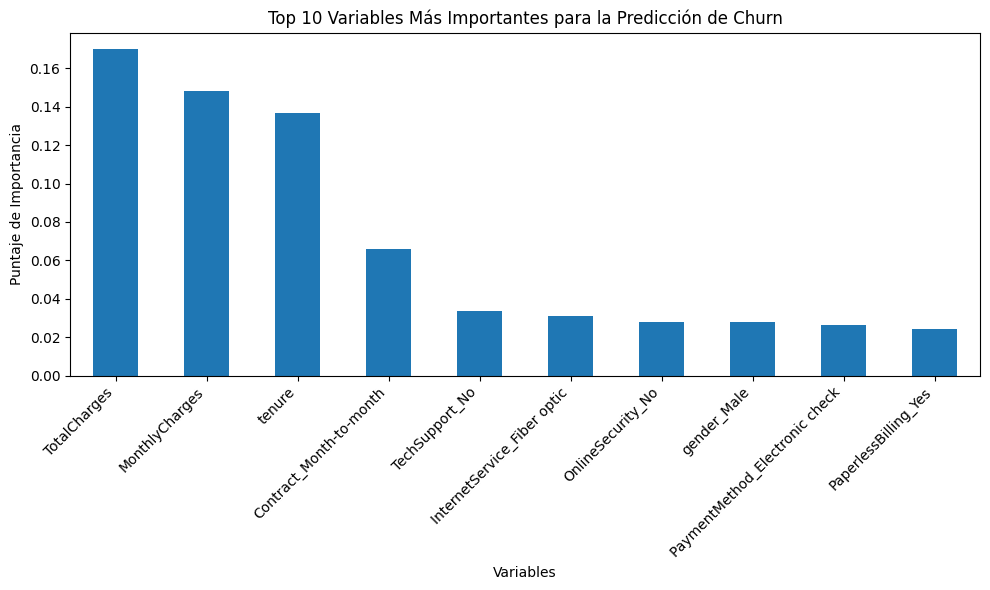

In [ ]:
# 1. Acceder a las importancias de las variables (features)
feature_importances = model.feature_importances_

# 2. Crear una Serie de pandas
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

# 3. Ordenar las importancias de las variables
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# 4. Imprimir las 10 variables más importantes
print("Top 10 variables más importantes para predecir la deserción (churn):")
print(sorted_feature_importances.head(10))

# 5. Visualizar las 10 variables más importantes
plt.figure(figsize=(10, 6))
sorted_feature_importances.head(10).plot(kind='bar')
plt.title('Top 10 Variables Más Importantes para la Predicción de Churn')
plt.xlabel('Variables')
plt.ylabel('Puntaje de Importancia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
